In [2]:
# Import necessary libraries
import pandas as pd

# Define file paths
file_paths = [
    "/content/drive/MyDrive/volatilities for indu index.xlsx",
    "/content/drive/MyDrive/dividends.xlsx",
    "/content/drive/MyDrive/spx index last price.xlsx",
    "/content/drive/MyDrive/usgg10yr_(risk_free_rate).xlsx",
    "/content/drive/MyDrive/fdtrmid_(interest_rate).xlsx",
    "/content/drive/MyDrive/ip_chng_mom_(industrial_production_sa).xlsx",
    "/content/drive/MyDrive/usertotn_(unemployment_rate).xlsx",
    "/content/drive/MyDrive/cpi_yoy_(inflation_rate).xlsx"
]

# Load the files into a list of DataFrames
dataframes = [pd.read_excel(file) for file in file_paths]

# Extract column names from each DataFrame
column_names = [set(df.columns) for df in dataframes]

# Find common columns across all DataFrames
common_columns = set.intersection(*column_names)
common_columns


set()

In [3]:
# Extract and display column names from each dataset to identify potential similarities
column_names_samples = {file.split('/')[-1]: df.columns.tolist() for file, df in zip(file_paths, dataframes)}

column_names_samples


{'volatilities for indu index.xlsx': ['date', 'VOL30', 'VOL60', 'VOL90'],
 'dividends.xlsx': ['date',
  'day_to_day_return_net_dvds',
  'day_to_day_return_gross_dvds'],
 'spx index last price.xlsx': ['date', 'spx index'],
 'usgg10yr_(risk_free_rate).xlsx': ['risk free', 'usgg10yr'],
 'fdtrmid_(interest_rate).xlsx': ['fdtrmid index', 'Unnamed: 1'],
 'ip_chng_mom_(industrial_production_sa).xlsx': ['ip chng index',
  'Unnamed: 1'],
 'usertotn_(unemployment_rate).xlsx': ['usertotn index', 'Unnamed: 1'],
 'cpi_yoy_(inflation_rate).xlsx': ['cpi yoy index', 'Unnamed: 1']}

In [4]:
# Dictionary to store potential date columns' data types and sample values from each dataset
date_columns_info = {}

# Iterate over each dataset and extract information about potential date columns
for file, df in zip(file_paths, dataframes):
    # File name to be used as key in the dictionary
    file_name = file.split('/')[-1]

    # Check if the column named 'date' exists in the dataset
    if 'date' in df.columns:
        date_col = 'date'
    else:
        # If 'date' column doesn't exist, consider the first column as the potential date column
        date_col = df.columns[0]

    # Store the data type and sample values of the potential date column
    date_columns_info[file_name] = {
        'data_type': str(df[date_col].dtype),
        'sample_values': df[date_col].head().values
    }

date_columns_info


{'volatilities for indu index.xlsx': {'data_type': 'datetime64[ns]',
  'sample_values': array(['1945-08-09T00:00:00.000000000', '1945-08-10T00:00:00.000000000',
         '1945-08-13T00:00:00.000000000', '1945-08-14T00:00:00.000000000',
         '1945-08-15T00:00:00.000000000'], dtype='datetime64[ns]')},
 'dividends.xlsx': {'data_type': 'datetime64[ns]',
  'sample_values': array(['1945-09-10T00:00:00.000000000', '1945-09-11T00:00:00.000000000',
         '1945-09-12T00:00:00.000000000', '1945-09-13T00:00:00.000000000',
         '1945-09-14T00:00:00.000000000'], dtype='datetime64[ns]')},
 'spx index last price.xlsx': {'data_type': 'datetime64[ns]',
  'sample_values': array(['1945-08-09T00:00:00.000000000', '1945-08-10T00:00:00.000000000',
         '1945-08-13T00:00:00.000000000', '1945-08-14T00:00:00.000000000',
         '1945-08-17T00:00:00.000000000'], dtype='datetime64[ns]')},
 'usgg10yr_(risk_free_rate).xlsx': {'data_type': 'datetime64[ns]',
  'sample_values': array(['1962-01-02T00:00

In [5]:
# Start with the first dataset as the base for merging
merged_data = dataframes[0]

# Iterate over the remaining datasets and merge them based on the potential date columns
for file, df in zip(file_paths[1:], dataframes[1:]):
    # Determine the name of the potential date column in the current dataset
    date_col = 'date' if 'date' in df.columns else df.columns[0]

    # Merge the current dataset with the merged data based on the date columns
    merged_data = pd.merge(merged_data, df, left_on='date', right_on=date_col, how='left')

    # Drop duplicate date columns if any
    if 'date' not in df.columns:
        merged_data.drop(columns=[date_col], inplace=True)

# Check the shape and the first few rows of the merged dataset
merged_shape = merged_data.shape
merged_head = merged_data.head()

merged_shape, merged_head


<ipython-input-5-bb07f840ca82>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 1_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = pd.merge(merged_data, df, left_on='date', right_on=date_col, how='left')


((18812, 12),
         date  VOL30  VOL60  VOL90  day_to_day_return_net_dvds  \
 0 1945-08-09  12.74  11.04  10.47                         NaN   
 1 1945-08-10  12.54  11.07  10.48                         NaN   
 2 1945-08-13  12.67  11.14  10.55                         NaN   
 3 1945-08-14  12.45  11.03  10.44                         NaN   
 4 1945-08-15  12.45  11.13  10.49                         NaN   
 
    day_to_day_return_gross_dvds  spx index  usgg10yr  Unnamed: 1_x  \
 0                           NaN      14.79       NaN           NaN   
 1                           NaN      14.78       NaN           NaN   
 2                           NaN      14.61       NaN           NaN   
 3                           NaN      14.70       NaN           NaN   
 4                           NaN        NaN       NaN           NaN   
 
    Unnamed: 1_y  Unnamed: 1_x  Unnamed: 1_y  
 0           NaN           NaN           NaN  
 1           NaN           NaN           NaN  
 2           NaN   

In [6]:
 # Remove columns with 'Unnamed' in their names, as they likely represent unnecessary columns created during the merging process
cleaned_merged_data = merged_data.loc[:, ~merged_data.columns.str.contains('^Unnamed')]

# Check the shape and the first few rows of the cleaned merged dataset
cleaned_merged_shape = cleaned_merged_data.shape
cleaned_merged_head = cleaned_merged_data.head()

cleaned_merged_shape, cleaned_merged_head


((18812, 8),
         date  VOL30  VOL60  VOL90  day_to_day_return_net_dvds  \
 0 1945-08-09  12.74  11.04  10.47                         NaN   
 1 1945-08-10  12.54  11.07  10.48                         NaN   
 2 1945-08-13  12.67  11.14  10.55                         NaN   
 3 1945-08-14  12.45  11.03  10.44                         NaN   
 4 1945-08-15  12.45  11.13  10.49                         NaN   
 
    day_to_day_return_gross_dvds  spx index  usgg10yr  
 0                           NaN      14.79       NaN  
 1                           NaN      14.78       NaN  
 2                           NaN      14.61       NaN  
 3                           NaN      14.70       NaN  
 4                           NaN        NaN       NaN  )

In [7]:
# Import necessary libraries for plotting
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the distribution of various columns in the dataset
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# Plot the distribution of various columns in the merged dataset
plotPerColumnDistribution(cleaned_merged_data, nGraphShown=10, nGraphPerRow=2)


<Figure size 960x0 with 0 Axes>

In [8]:
# Function to plot the correlation matrix for numerical columns in the dataset
def plotCorrelationMatrix(df, graphWidth):
    # We don't have 'dataframeName' in the original dataset, so we create a new attribute to store the name
    df.dataframeName = 'Merged Dataset'
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {df.dataframeName}', fontsize=15)
    plt.show()

# Plot the correlation matrix for numerical columns in the merged dataset
plotCorrelationMatrix(cleaned_merged_data, graphWidth=12)


No correlation plots shown: The number of non-NaN or constant columns (1) is less than 2


<ipython-input-8-0613c30aae8f>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


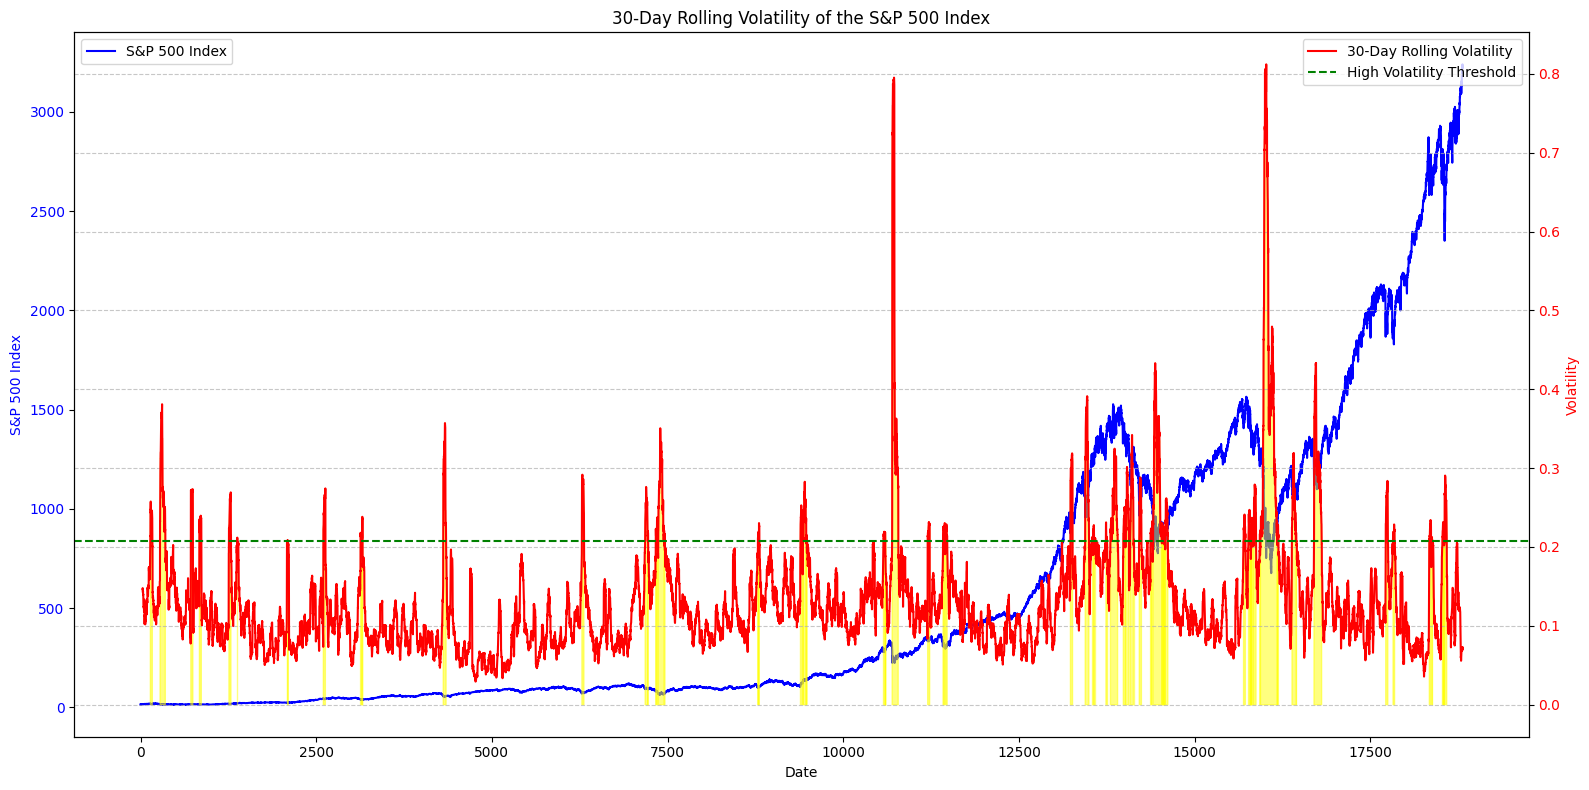

In [26]:
# Recalculate the 30-day rolling volatility for the S&P 500 Index
merged_data['30_day_volatility'] = merged_data['spx index'].pct_change().rolling(window=30).std() * (252**0.5)

# Define high and low volatility thresholds
high_vol_threshold = merged_data['30_day_volatility'].mean() + merged_data['30_day_volatility'].std()

# Re-plotting the improved graph for 30-Day Rolling Volatility of the S&P 500 Index

# Create a new figure and axis
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot the S&P 500 Index on the left y-axis
ax1.plot(merged_data['spx index'], color='b', label='S&P 500 Index')
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Index', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a second y-axis to plot the 30-day rolling volatility
ax2 = ax1.twinx()
ax2.plot(merged_data['30_day_volatility'], color='r', label='30-Day Rolling Volatility')
ax2.set_ylabel('Volatility', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.axhline(y=high_vol_threshold, color='g', linestyle='--', label='High Volatility Threshold')
ax2.legend(loc='upper right')

# Highlight periods of high volatility with a shaded region
high_vol_periods = merged_data['30_day_volatility'] > high_vol_threshold
ax2.fill_between(merged_data.index, 0, merged_data['30_day_volatility'], where=high_vol_periods, color='yellow', alpha=0.5, label='High Volatility Periods')

# Customize the graph
plt.title('30-Day Rolling Volatility of the S&P 500 Index')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the graph
plt.show()



<ipython-input-23-d5cd10379514>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data.corr()


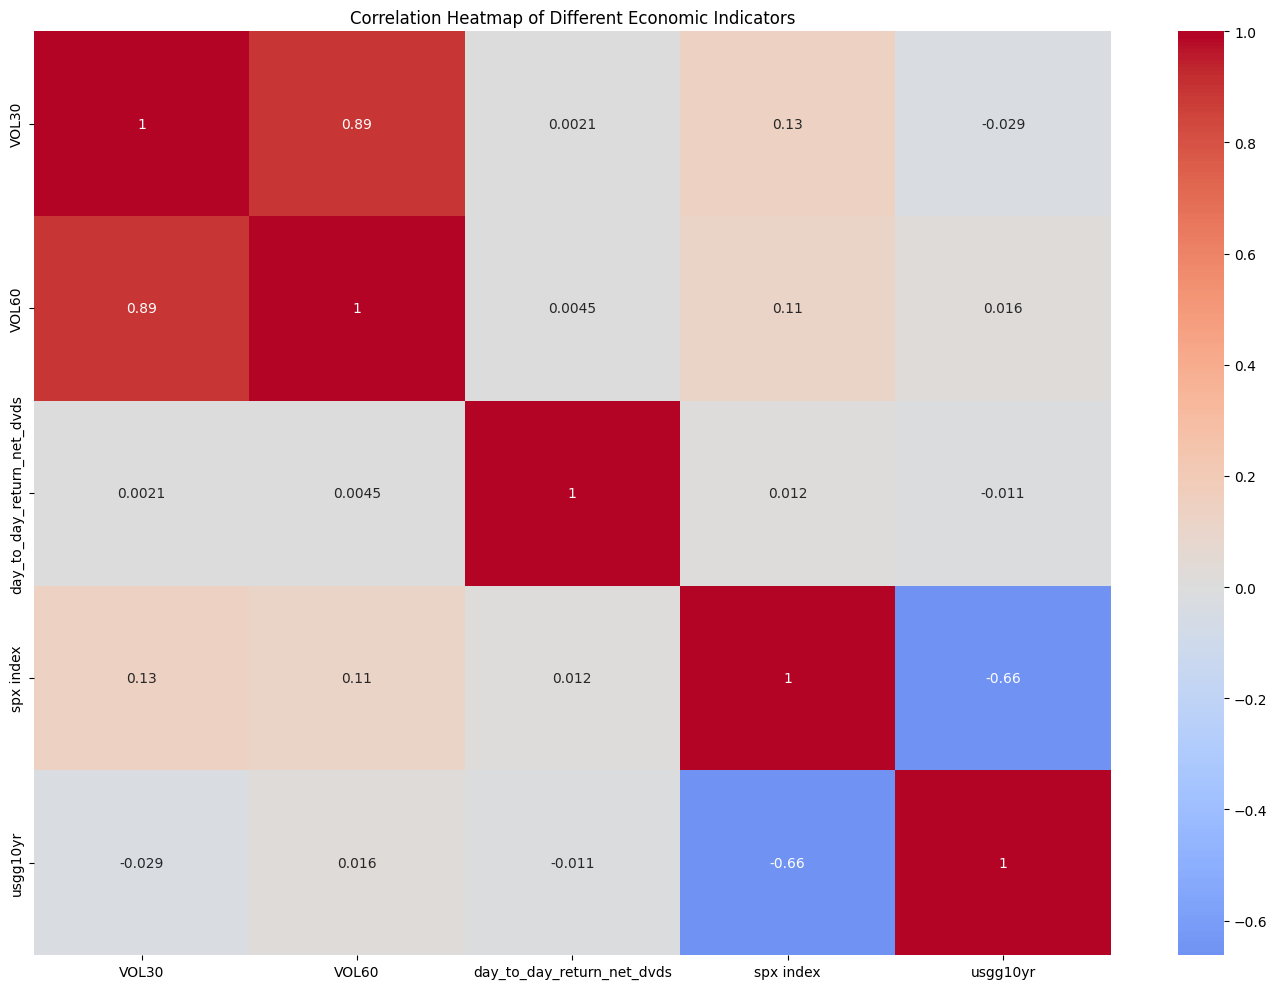

In [23]:
import seaborn as sns

# Select relevant columns for correlation analysis
selected_columns = ['VOL30', 'VOL60', 'VOL90', 'day_to_day_return_net_dvds', 'spx index', 'usgg10yr']

# Compute the correlation matrix
correlation_data = merged_data[selected_columns]
correlation_matrix = correlation_data.corr()

# Generate the Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Different Economic Indicators')
plt.tight_layout()
plt.show()


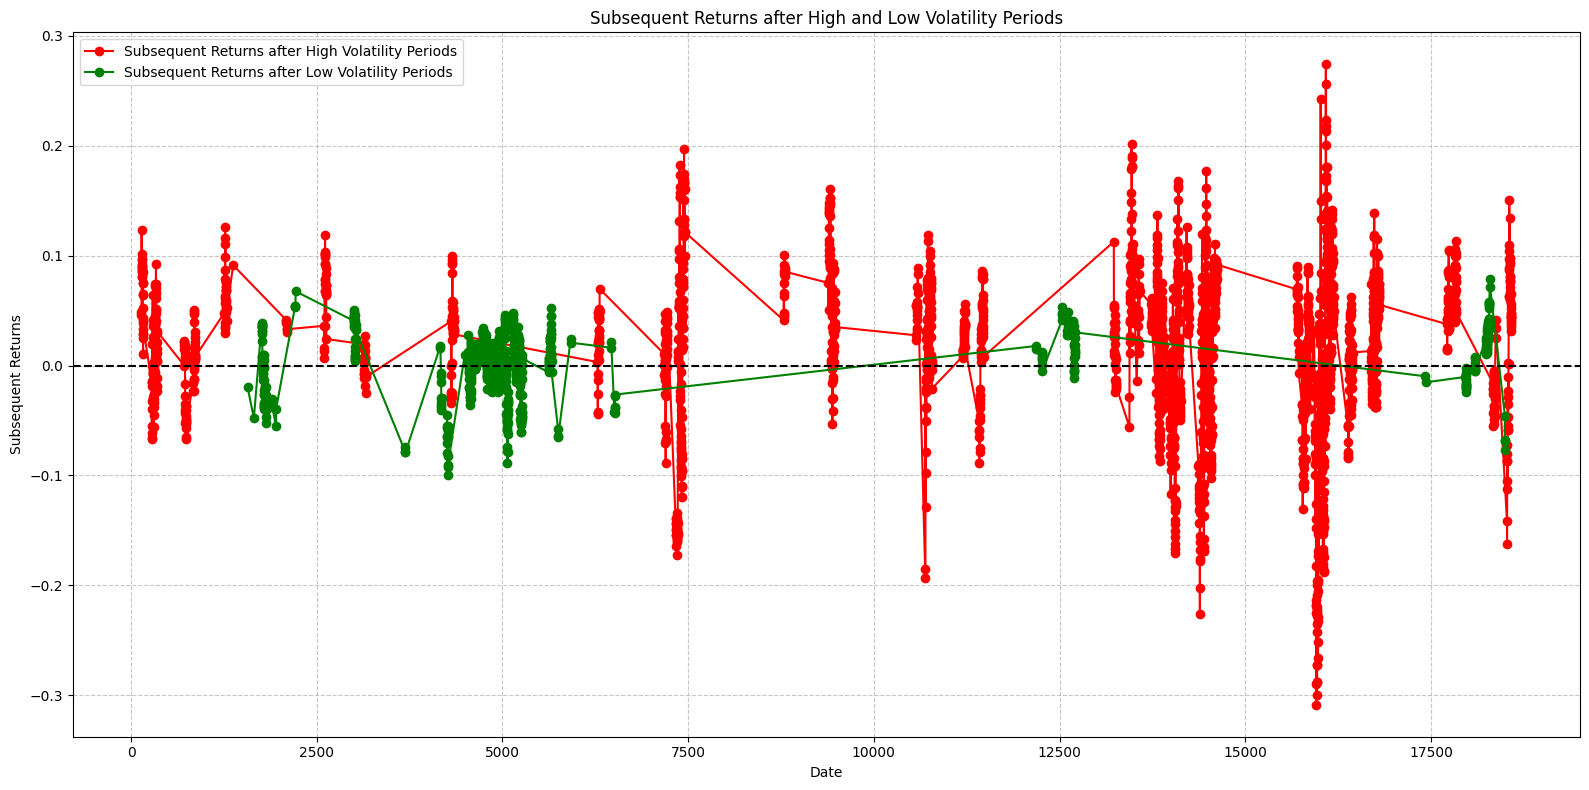

In [24]:
import matplotlib.pyplot as plt

# Define high and low volatility thresholds
high_vol_threshold = merged_data['VOL30'].mean() + merged_data['VOL30'].std()
low_vol_threshold = merged_data['VOL30'].mean() - merged_data['VOL30'].std()

# Calculate subsequent returns
merged_data['Subsequent_Return'] = merged_data['spx index'].pct_change(30).shift(-30)

# Plot the graph
plt.figure(figsize=(16, 8))

# Plot subsequent returns after high volatility periods
high_vol_periods = merged_data['VOL30'] > high_vol_threshold
plt.plot(merged_data.loc[high_vol_periods, 'Subsequent_Return'], 'ro-', label='Subsequent Returns after High Volatility Periods')

# Plot subsequent returns after low volatility periods
low_vol_periods = merged_data['VOL30'] < low_vol_threshold
plt.plot(merged_data.loc[low_vol_periods, 'Subsequent_Return'], 'go-', label='Subsequent Returns after Low Volatility Periods')

# Add horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--')

# Customize the graph
plt.title('Subsequent Returns after High and Low Volatility Periods')
plt.xlabel('Date')
plt.ylabel('Subsequent Returns')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the graph
plt.show()
